# Moving Average Process

### Importing Relevant Packages

In [1]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = (10,7.5)

### Simulating a Moving Average Process with an Order of 2

AKA an MA(2) Process

$ y_t = 0.9Z_{t-1} + 0.3Z_{t-2} $

First, we need to define both an MA(2) Array and an AR(2) array. 

The first number we input below is the coefficient at lag zero which is almost exclusively one, so the array should always start with one. 

In [4]:
ma2 = np.array([1, 0.9, 0.3])
ar2 = np.array([1, 0, 0])

In [5]:
print(ma2)
print(ar2)

[1.  0.9 0.3]
[1 0 0]


In [6]:
MA2_process = ArmaProcess(ar2, ma2).generate_sample(nsample=1000)

Now we can plot the simulation. 

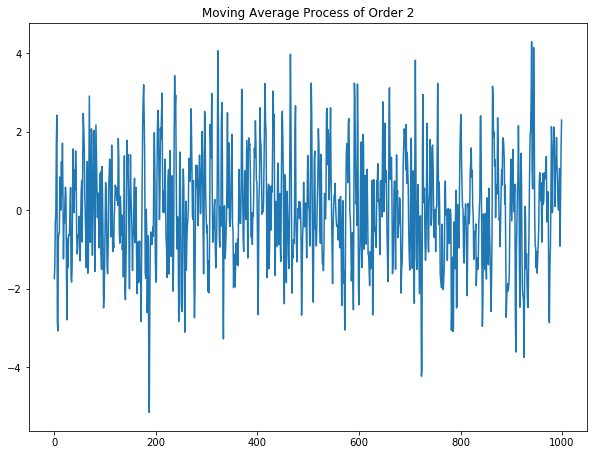

In [9]:
plt.plot(MA2_process)
plt.title('Moving Average Process of Order 2');

It is hard to see, so let's zoom in on a part of the graph.

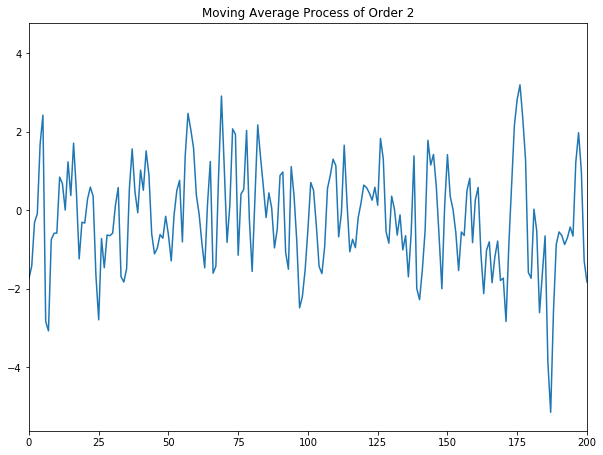

In [10]:
plt.plot(MA2_process)
plt.title('Moving Average Process of Order 2')
plt.xlim(0,200)
plt.show()

Now, let's test the ACF. We should not see significant peaks after the order.  

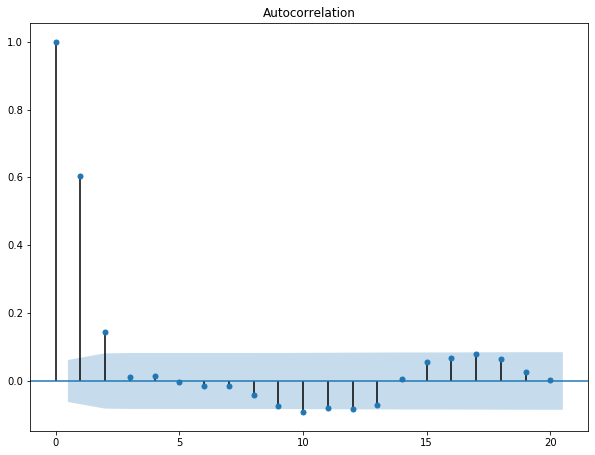

In [11]:
plot_acf(MA2_process, lags = 20);

Now let's model our simulation to see if we can get back the parameters that we set up at first. Our original parameters were 0.9 and 0.3.

Explaining the Order of 0,0,2: 
We haven't seen this yet in the notes. 
The first zero: Is for the AR Process. We don't have an AR process here so we put a zero. 
The second zero: Order of differencing: We haven't seen this yet so we are setting it to zero as well. 
The two: This is the order of the MA process. Since we know we have simulated an MA process of 2, we can put a two here to indicate that we want an equation with an order of 2. 

In [18]:
MA_model = ARIMA(MA2_process, order=(0,0,2), enforce_stationarity = False).fit()

print(MA_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -1434.173
Date:                Sun, 22 May 2022   AIC                           2876.346
Time:                        18:11:32   BIC                           2895.965
Sample:                             0   HQIC                          2883.803
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0241      0.070      0.343      0.732      -0.114       0.162
ma.L1          0.8947      0.033     27.406      0.000       0.831       0.959
ma.L2          0.2746      0.032      8.695      0.0

For lag one, we got very close to .9 and for lag two, we got very close to .3. This is a great prediction of the original params. 